# 분류 (성별 예측)

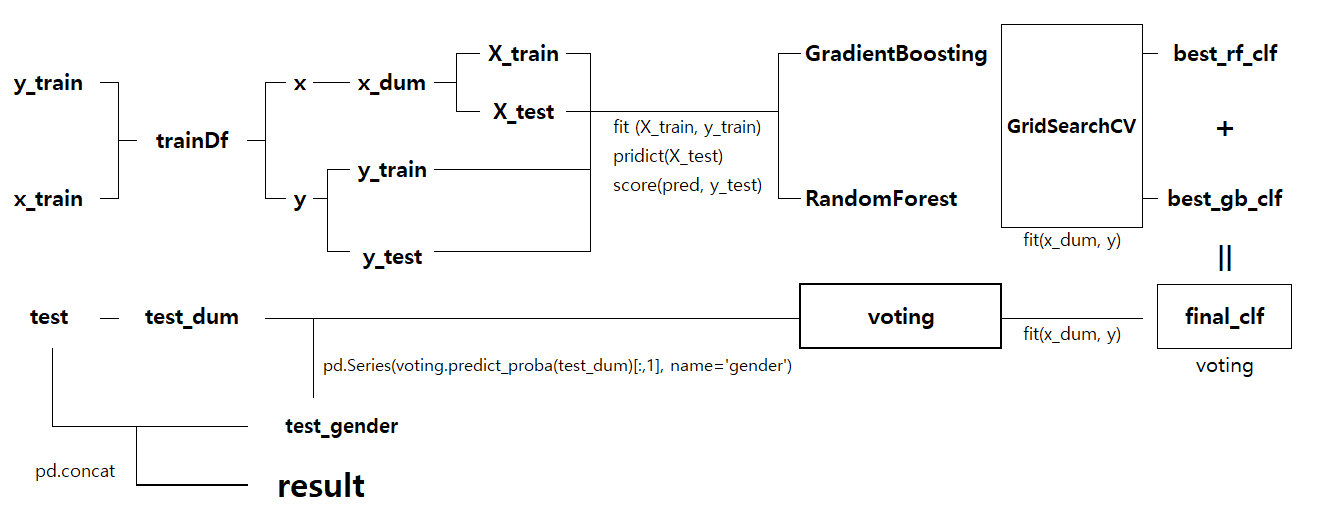

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
import pandas as pd
y_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/y_train.csv')
X_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/X_train.csv',encoding='euc-kr')
test  = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/X_test.csv',encoding='euc-kr')

## 데이터 전처리 및 EDA

In [3]:
trainDf = pd.merge(y_train,X_train)
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1


In [4]:
trainNAN = trainDf.isnull().sum()
testNAN = test.isnull().sum()

In [5]:
print('trainNAN \n', trainNAN)
print('testNAN\n', testNAN)

trainNAN 
 cust_id       0
gender        0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64
testNAN
 cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64


In [6]:
isnullGender=trainDf[trainDf['환불금액'].isnull()].gender.value_counts()
print(isnullGender)

0    1269
1    1026
Name: gender, dtype: int64


In [7]:
trainDf['환불금액'].describe()

count    1.205000e+03
mean     2.407822e+07
std      4.746453e+07
min      5.600000e+03
25%      2.259000e+06
50%      7.392000e+06
75%      2.412000e+07
max      5.637530e+08
Name: 환불금액, dtype: float64

-> 해석: 환불금액의 경우 최솟값이 0이 아니기에, NAN은 결측치가 아닌 환불을 하지않은 경우(0원)으로 판단할 수 있다. nan을 0으로 채운다

In [8]:
trainDf['환불금액']=trainDf['환불금액'].fillna(0)
test['환불금액']=test['환불금액'].fillna(0)

In [9]:
trainDf.head(3)

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1


In [10]:
main_index=trainDf['주구매상품'].value_counts().index #value_counts() : 빈도분석  --> 거기서 index만 반환
print('주구매상품 유일값 수', len(main_index))
print('주구매상품 유일값 리스트', list(main_index))

주구매상품 유일값 수 42
주구매상품 유일값 리스트 ['기타', '가공식품', '농산물', '화장품', '시티웨어', '디자이너', '수산품', '캐주얼', '명품', '섬유잡화', '골프', '스포츠', '일용잡화', '모피/피혁', '육류', '남성 캐주얼', '구두', '건강식품', '차/커피', '아동', '피혁잡화', '축산가공', '주방용품', '셔츠', '젓갈/반찬', '주방가전', '트래디셔널', '남성정장', '생활잡화', '주류', '가구', '커리어', '란제리/내의', '대형가전', '식기', '액세서리', '침구/수예', '통신/컴퓨터', '보석', '악기', '남성 트랜디', '소형가전']


In [11]:
main_center=trainDf['주구매지점'].value_counts().index
print('주구매지점 유일값 수', len(main_center))
print('주구매지점 유일값 리스트', list(main_center))

주구매지점 유일값 수 24
주구매지점 유일값 리스트 ['본  점', '잠실점', '분당점', '부산본점', '영등포점', '일산점', '강남점', '광주점', '노원점', '청량리점', '대전점', '미아점', '부평점', '동래점', '관악점', '인천점', '안양점', '포항점', '대구점', '센텀시티점', '울산점', '전주점', '창원점', '상인점']


dtypes가 number인 것만 numeric에 넣는데 trainDf의 첫번째변수(cust_id)와 두번째변수(gender)는 제외시키고 추출

In [12]:
t=trainDf.copy()
import numpy as np
numeric=t.select_dtypes(include=np.number).columns[2:] 

총구매액


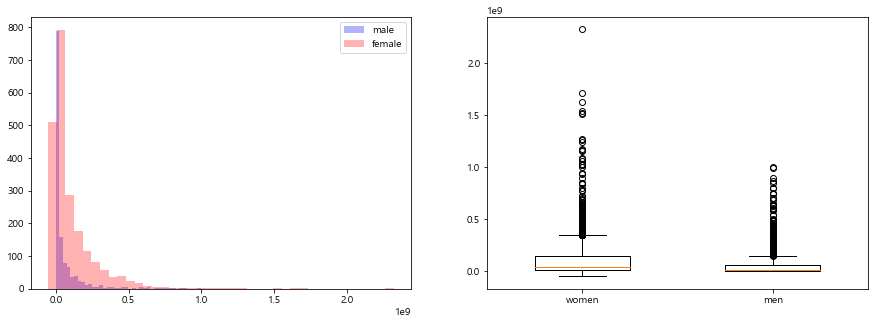

최대구매액


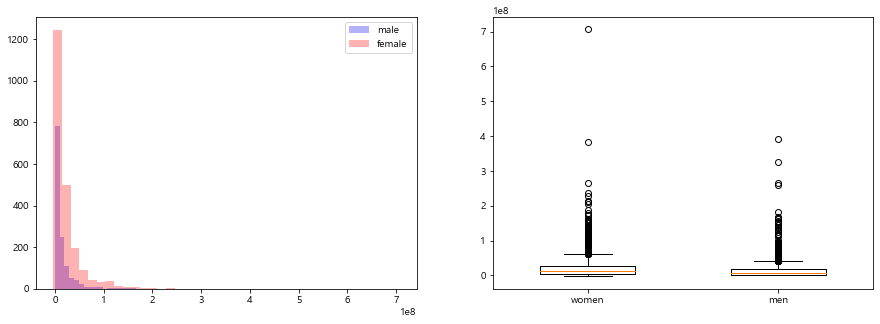

환불금액


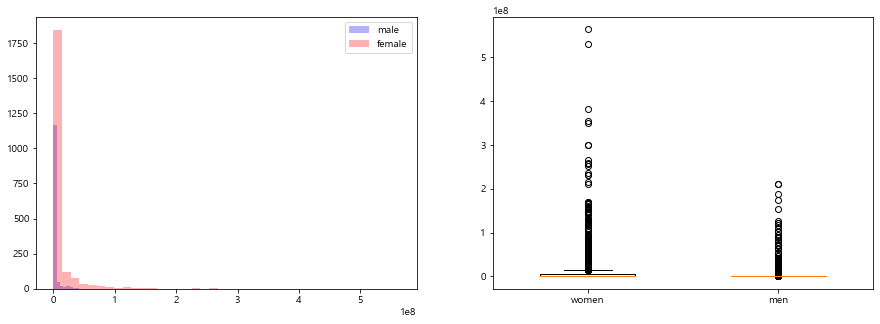

내점일수


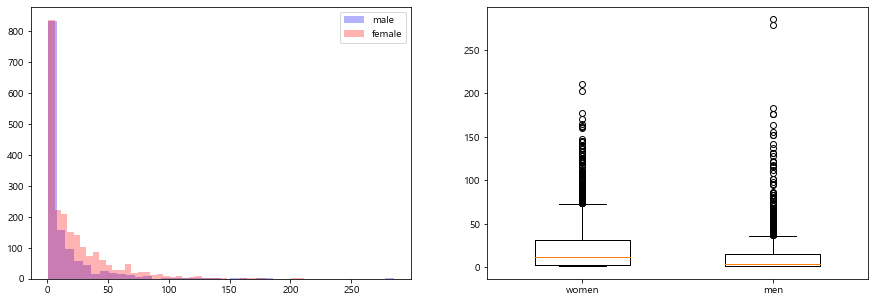

내점당구매건수


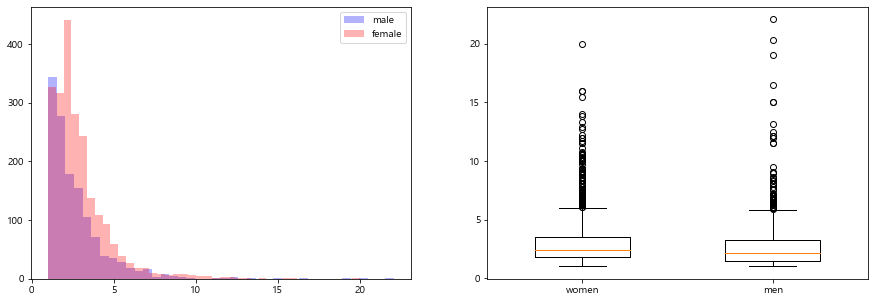

주말방문비율


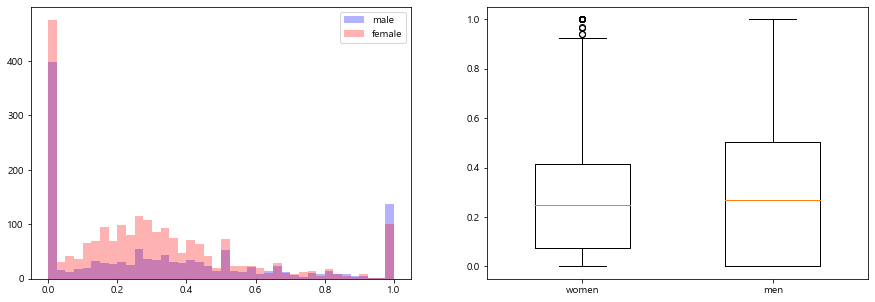

구매주기


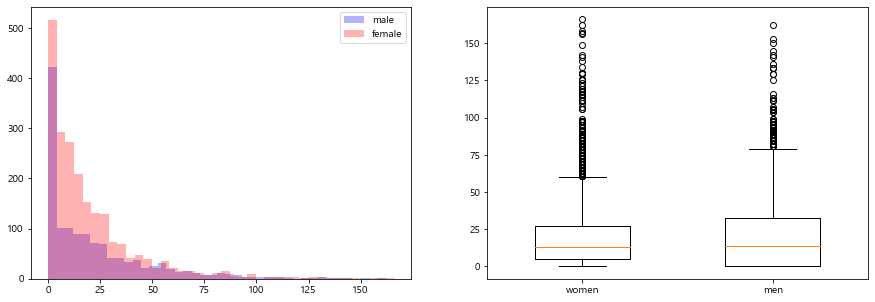

In [13]:
import matplotlib.pyplot as plt
for v in numeric:
    df=t[[v, 'gender']]
    male=df[df.gender==1]
    female=df[df.gender==0]
    fig, axes=plt.subplots(1,2,figsize=(15,5))
    print(v)
    axes[0].hist(male[v], alpha=0.3, color='blue', label='male', bins=40)
    axes[0].hist(female[v], alpha=0.3, color='red', label='female', bins=40)
    axes[0].legend()
    axes[1].boxplot(female[v], positions=[0], widths=0.5)
    axes[1].boxplot(male[v], positions=[1], widths=0.5)
    axes[1].set_xticklabels(['women', 'men'])
    plt.show()

In [14]:
t.groupby('주구매지점').agg(['mean', 'count'])['총구매액'].sort_values('count', ascending=False).head(3)

,mean,count
주구매지점,,
본 점,1.023784e+08,1077
잠실점,8.377841e+07,474
분당점,7.318428e+07,436


- t.groupby('주구매지점').agg(['mean', 'count']) : t의 모든 변수에 대한 mean/count 값 출력
- ['총구매액'] : 그 중에서 총구매액만 출력하는데 \n
- sort_values('count', ascending=False) : 'count'변수를 내림차순하여 \n
- head(3) : 상위 3개만 출력할꺼야

In [15]:
pv_t=t.groupby(['주구매지점', '주구매상품']).count()['cust_id'].reset_index().rename(columns={'cust_id':'counts'})
pv_t.head(10)

,주구매지점,주구매상품,counts
0,강남점,가공식품,22
1,강남점,건강식품,2
2,강남점,구두,1
3,강남점,기타,31
4,강남점,남성 캐주얼,1
5,강남점,농산물,17
6,강남점,디자이너,11
7,강남점,명품,1
8,강남점,모피/피혁,3
9,강남점,생활잡화,1


- t.groupby(['주구매지점', '주구매상품']).count() : 주구매저점 / 주구매상품 별로 모든 변수에 대한 숫자 출력
- ['cust_id'] : 그 중 cust_id 변수의 갯수만 출력 (여기서 인덱스는 ('강남점', '가공식품') ('강남점', '건강식품') 꼴이다)
- reset_index() 인덱스 초기화한다
- rename(columns={cust_id': 'counts'}) : 컬럼 cust_id를 counts로 바꿔서 출력

In [16]:
pv_data=pv_t.pivot(index='주구매지점', columns='주구매상품', values='counts').fillna(0)
for v in pv_data.columns:
    pv_data[v]=pv_data[v]/pv_data.sum(axis=1) *100
pv_data.head(3)

주구매상품,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,...,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
주구매지점,,,,,,,,,,,,,,,,,,,,,
강남점,15.172414,0.0,1.447467,0.000000,0.726639,22.570648,0.775692,0.0,0.0,13.209746,...,0.000000,0.865519,1.733055,0.0,1.737074,0.0,0.0,0.870525,0.871507,7.852356
관악점,6.521739,0.0,0.000000,0.000000,4.038630,23.273689,4.774481,0.0,0.0,15.477830,...,1.350510,0.000000,0.000000,0.0,2.688295,0.0,0.0,0.000000,0.000000,3.995478
광주점,4.385965,0.0,0.881943,2.648588,1.771220,27.509653,0.000000,0.0,0.0,10.073503,...,0.949979,0.000000,1.900861,0.0,5.707962,0.0,0.0,0.000000,0.000000,4.769887


- pv_t.pivot(index='주구매지점', columns='주구매상품', values='counts') : 주구매지점/주구매상품 값은 counts를 넣는 pv_data를 만들어라
- fillna(0) pv_data에서 결측값은 0을 넣어라 
- pv_data.sum(axis=1) : 각 지점별 counts의 합
- pv_data[v]=pv_data[v]/pv_data.sum(axis=1)*100 : 각 지점에서 상품이 팔린 비율

In [17]:
pv_data=pv_data.loc[pv_data.index !='상인점']

상인점의 경우 1가지 구매 케이스밖에 없기 때문에 삭제

In [18]:
center_gender=t.groupby(['주구매지점', 'gender']).count()['cust_id'].reset_index()
center_gender=center_gender.pivot(index='주구매지점', columns='gender', values='cust_id').fillna(0)
center_gender.head(5)

gender,0,1
주구매지점,,
강남점,108.0,37.0
관악점,27.0,19.0
광주점,68.0,46.0
노원점,62.0,28.0
대구점,2.0,5.0


In [19]:
center_gender['total']=center_gender[0]+center_gender[1]
center_gender['ratio']=center_gender[1]/center_gender['total']*100

In [20]:
t.groupby('주구매지점').mean()['총구매액'].to_frame().sort_values('총구매액').head(3)

,총구매액
주구매지점,
센텀시티점,1.098891e+07
전주점,3.200927e+07
안양점,6.055826e+07


## one-hot encoding

In [21]:
x=trainDf.drop(['cust_id', 'gender'], axis=1)
y=trainDf['gender']

In [22]:
#label 인코딩
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_label=x.copy()
for v in ['주구매상품', '주구매지점']:
    x_label[v]=le.fit_transform(x_label[v])
x_label.head(3)

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,68282840,11264000,6860000.0,5,0,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,21,19,2,1.500000,0.000000,1
2,3197000,1639000,0.0,6,1,2,2.000000,0.000000,1


In [23]:
#더미변수화
x_dum=pd.get_dummies(x)
x_dum.head(3)

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2136000,2136000,300000.0,2,1.500000,0.000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3197000,1639000,0.0,2,2.000000,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_dum=pd.get_dummies(test)
missing_cols=set(x_dum.columns)-set(test_dum.columns) #train 데이터에는 있는데 test 데이터에 없는 더미-> missing_cols
for c in missing_cols:
    test_dum[c]=0 # 해당 더미변수 컬럼에 0을 넣어줌
test_dum=test_dum[x_dum.columns]
test_dum.head(3)

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,...,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,70900400,22000000,4050000.0,13,1.461538,0.789474,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,310533100,38558000,48034700.0,90,2.433333,0.369863,3,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,305264140,14825000,30521000.0,101,14.623762,0.083277,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 데이터 정규화 

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_dum)
test_dum=sc.transform(test_dum)

주의: train data에는 fit_transform 이며, test data에는 transform만 적용 (test data에 또 학습을 시키면 train data와 조건 변형되므로)

## 데이터 분리하기

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_dum, y, test_size=0.3, random_state=0, stratify=y)

학습데이터를 X_train, X_test, y_train, y_test로 분리시킨다

## 모델링

In [27]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #의사결정트리
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier #보팅, 랜덤포레스트, GBM
from xgboost import XGBClassifier #XGB

lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)
dt_clf=DecisionTreeClassifier(random_state=156)
vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
gb_clf=GradientBoostingClassifier(random_state=0)
xgb_clf=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

lr_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
vo_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=True)

lr_pred=lr_clf.predict(X_test)
knn_pred=knn_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
vo_pred=vo_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
gb_pred=gb_clf.predict(X_test)
xgb_pred=xgb_clf.predict(X_test)

[0]	validation_0-auc:0.62547
[1]	validation_0-auc:0.63581
[2]	validation_0-auc:0.63415
[3]	validation_0-auc:0.64707
[4]	validation_0-auc:0.65045
[5]	validation_0-auc:0.67231
[6]	validation_0-auc:0.67282
[7]	validation_0-auc:0.67613
[8]	validation_0-auc:0.67716
[9]	validation_0-auc:0.67892
[10]	validation_0-auc:0.68022
[11]	validation_0-auc:0.67997
[12]	validation_0-auc:0.68305
[13]	validation_0-auc:0.68668
[14]	validation_0-auc:0.68738
[15]	validation_0-auc:0.68811
[16]	validation_0-auc:0.68922
[17]	validation_0-auc:0.69064
[18]	validation_0-auc:0.69293
[19]	validation_0-auc:0.69354
[20]	validation_0-auc:0.69400
[21]	validation_0-auc:0.69409
[22]	validation_0-auc:0.69449
[23]	validation_0-auc:0.69584
[24]	validation_0-auc:0.69683
[25]	validation_0-auc:0.69681
[26]	validation_0-auc:0.69794
[27]	validation_0-auc:0.69841
[28]	validation_0-auc:0.69808
[29]	validation_0-auc:0.69926
[30]	validation_0-auc:0.69931
[31]	validation_0-auc:0.69966
[32]	validation_0-auc:0.69976
[33]	validation_0-au

C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-auc:0.70353
[39]	validation_0-auc:0.70371
[40]	validation_0-auc:0.70387
[41]	validation_0-auc:0.70438
[42]	validation_0-auc:0.70455
[43]	validation_0-auc:0.70448
[44]	validation_0-auc:0.70444
[45]	validation_0-auc:0.70435
[46]	validation_0-auc:0.70554
[47]	validation_0-auc:0.70466
[48]	validation_0-auc:0.70486
[49]	validation_0-auc:0.70493
[50]	validation_0-auc:0.70456
[51]	validation_0-auc:0.70454
[52]	validation_0-auc:0.70478
[53]	validation_0-auc:0.70502
[54]	validation_0-auc:0.70465
[55]	validation_0-auc:0.70406
[56]	validation_0-auc:0.70462
[57]	validation_0-auc:0.70475
[58]	validation_0-auc:0.70468
[59]	validation_0-auc:0.70541
[60]	validation_0-auc:0.70575
[61]	validation_0-auc:0.70585
[62]	validation_0-auc:0.70532
[63]	validation_0-auc:0.70519
[64]	validation_0-auc:0.70529
[65]	validation_0-auc:0.70464
[66]	validation_0-auc:0.70408
[67]	validation_0-auc:0.70425
[68]	validation_0-auc:0.70434
[69]	validation_0-auc:0.70405
[70]	validation_0-auc:0.70424
[71]	valid

In [28]:
from sklearn.metrics import accuracy_score
print('LogisticRegression 분류기 정확도:', accuracy_score(y_test, lr_pred))
print('KNN 분류기 정확도:', accuracy_score(y_test, knn_pred))
print('Decision Tree 분류기 정확도:', accuracy_score(y_test, dt_pred))
print('Voting 분류기 정확도:', accuracy_score(y_test, vo_pred))
print('Random Forest 분류기 정확도:', accuracy_score(y_test, rf_pred))
print('Gradient Boosting 분류기 정확도:', accuracy_score(y_test, gb_pred))
print('XGB 분류기 정확도:', accuracy_score(y_test, xgb_pred))

LogisticRegression 분류기 정확도: 0.6238095238095238
KNN 분류기 정확도: 0.6304761904761905
Decision Tree 분류기 정확도: 0.6123809523809524
Voting 분류기 정확도: 0.6342857142857142
Random Forest 분류기 정확도: 0.6580952380952381
Gradient Boosting 분류기 정확도: 0.6723809523809524
XGB 분류기 정확도: 0.6780952380952381


### cross_val_score 

In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores_lr=cross_val_score(lr_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_knn=cross_val_score(knn_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_dt=cross_val_score(dt_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_vo=cross_val_score(vo_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_rf=cross_val_score(rf_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_gb=cross_val_score(gb_clf, x_dum, y, scoring='roc_auc', cv=3)
scores_xgb=cross_val_score(xgb_clf, x_dum, y, scoring='roc_auc', cv=3)

print('cross_LogisticRegression 분류기 정확도:', np.round(np.mean(scores_lr),4))
print('corss_KNN 분류기 정확도:', np.round(np.mean(scores_knn),4))
print('cross_Decision Tree 분류기 정확도:', np.round(np.mean(scores_dt),4))
print('cross_Voting 분류기 정확도:', np.round(np.mean(scores_vo),4))
print('cross_Random Forest 분류기 정확도:', np.round(np.mean(scores_rf),4))
print('cross_Gradient Boosting 분류기 정확도:', np.round(np.mean(scores_gb),4))
print('cross_XGB 분류기 정확도:', np.round(np.mean(scores_xgb),4))

C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\choidi\anaconda3\envs\Gisa\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_LogisticRegression 분류기 정확도: 0.6339
corss_KNN 분류기 정확도: 0.5768
cross_Decision Tree 분류기 정확도: 0.5442
cross_Voting 분류기 정확도: 0.6057
cross_Random Forest 분류기 정확도: 0.6539
cross_Gradient Boosting 분류기 정확도: 0.6694
cross_XGB 분류기 정확도: 0.6528


## GridSearchCV

가장 높은 성능을 보인 Gradient Boosting과 Random Forest 분류기로 앙상블 시행

In [30]:
from sklearn.model_selection import GridSearchCV
rf_params={'n_estimators':[100], 'max_depth': [6,8,10,12], 'min_samples_leaf':[8,12,18], 'min_samples_split':[8,16,20]}
gb_params={'n_estimators':[100,500], 'learning_rate' : [0.05, 0.1]}

In [31]:
grid_rf_clf=GridSearchCV(rf_clf, param_grid=rf_params, scoring='roc_auc', cv=2, n_jobs=-1)
grid_gb_clf=GridSearchCV(gb_clf, param_grid=gb_params, scoring='roc_auc', cv=2, verbose=1)
grid_rf_clf.fit(x_dum, y)
grid_gb_clf.fit(x_dum, y)
best_rf_clf=grid_rf_clf.best_estimator_
best_gb_clf=grid_gb_clf.best_estimator_

Fitting 2 folds for each of 4 candidates, totalling 8 fits


## Voting

In [32]:
from sklearn.ensemble import VotingClassifier
final_clf=VotingClassifier(estimators=[('RF', best_rf_clf), ('GB', best_gb_clf)], voting='soft', n_jobs=4)

In [33]:
voting=final_clf.fit(x_dum, y)

## 예측 결과

In [34]:
test_gender=pd.Series(voting.predict_proba(test_dum)[:,1], name='gender')

In [35]:
results=pd.concat([test.cust_id, test_gender], axis=1)
results.head(10)

,cust_id,gender
0,3500,0.566254
1,3501,0.555867
2,3502,0.591271
3,3503,0.587948
4,3504,0.594253
5,3505,0.524528
6,3506,0.605452
7,3507,0.626144
8,3508,0.533704
9,3509,0.598282


In [36]:
results.to_csv('ensemble_voting.csv', index=False)